In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Okay! So here we're going to be exploring different year' catches per unit effort! That's the total amount of things caught, divided by how many times we went seining. Which should be equivalent to the average catch for each year.

In [28]:
db = pd.read_csv('Created CSVs/Cleaned_For_Analysis_All_Data.csv')

## Here we're ditching comb jellies from the analysis, as our  marking of their catch is a it weird. That said, perhaps they should be included. Worth questioning

In [29]:

nojelly_db = db[~db['Grouped Corrected Common Name'].isin(['comb jelly', 'atlantic silverside'])]
#nojelly_db = db[db['Grouped Corrected Common Name'] != 'comb jelly']

In [30]:
graph_db = db[['Date','Corrected # Hauls','Corrected Common Name','Corrected Quantity', 'Grouped Corrected Common Name' ]]

In [31]:
nojellygraph_db = nojelly_db[['Date','Corrected # Hauls','Corrected Common Name','Corrected Quantity' ]]

In [32]:
import dateutil

In [33]:
graph_db['Date'] = [dateutil.parser.parse(date) for date in graph_db['Date']]
nojellygraph_db['Date'] = [dateutil.parser.parse(date) for date in nojellygraph_db['Date']]

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
graph_db['Year'] = [date.year for date in graph_db['Date']]
nojellygraph_db['Year'] = [date.year for date in nojellygraph_db['Date']]

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## And we've simplified our dataframe and added year to it

In [35]:
graph_db.head()

,Date,Corrected # Hauls,Corrected Common Name,Corrected Quantity,Grouped Corrected Common Name,Year
0,2008-09-13,NaN,sea squirt,1,tunicates,2008
1,2008-09-13,NaN,shore shrimp,1,shrimp,2008
2,2008-09-13,NaN,mantis shrimp,1,shrimp,2008
3,2008-09-13,NaN,sand shrimp,1,shrimp,2008
4,2008-09-13,NaN,unidentified hermit crab,1,hermit crab,2008


## Let's make a general for funsies graph of catches per year.
### This shows the results without jellies, and there is a bit of a difference.

In [36]:
grouped_db = graph_db.groupby('Year', as_index=False).sum()
nojellygrouped_db =nojellygraph_db.groupby('Year', as_index=False).sum()

In [37]:
grouped_db = grouped_db[grouped_db['Year']<2018]
nojellygrouped_db = nojellygrouped_db[nojellygrouped_db['Year']<2018]

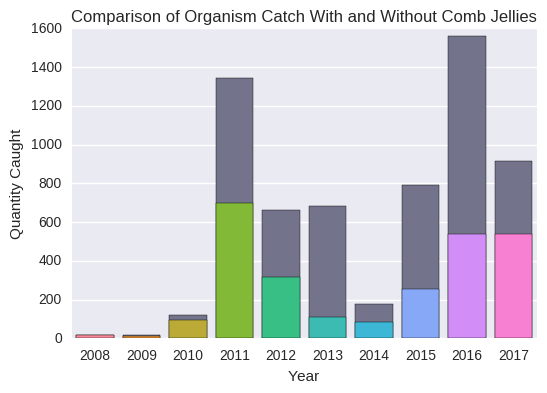

In [38]:
ax = sns.barplot(x="Year", y="Corrected Quantity", data=grouped_db, color= 'blue',saturation = 0.1)
ax = sns.barplot(x="Year", y="Corrected Quantity", data=nojellygrouped_db, saturation=1)
ax.set_title("Comparison of Organism Catch With and Without Comb Jellies")
ax.set_ylabel('Quantity Caught')

In [39]:
D = {}
Species_count = {}
for year in list(set(graph_db['Year'])):
    if  year < 2018:
        year_data = graph_db[graph_db['Year'] == year]
        #print year, set(year_data['Date'])
        D[year] = len(list(set(year_data['Date'])))
        Species_count[year] = len(list(set(year_data['Corrected Common Name'])))
        
nojellyD = {}
nojellySpecies_count = {}
for year in list(set(nojellygraph_db['Year'])):
    if  year < 2018:
        year_data = nojellygraph_db[nojellygraph_db['Year'] == year]
        #print year, set(year_data['Date'])
        nojellyD[year] = len(list(set(year_data['Date'])))
        nojellySpecies_count[year] = len(list(set(year_data['Corrected Common Name'])))

In [40]:
grouped_db['# of Seins'] = [D[x] for x in grouped_db['Year']]
nojellygrouped_db['# of Seins'] = [nojellyD[x] for x in nojellygrouped_db['Year']]

In [41]:
grouped_db['# of Species'] = [Species_count[x] for x in grouped_db['Year']]
nojellygrouped_db['# of Species'] = [nojellySpecies_count[x] for x in nojellygrouped_db['Year']]

In [42]:
grouped_db['Catch Per Seine'] = 1.0*grouped_db['Corrected Quantity'] /grouped_db['# of Seins']
nojellygrouped_db['Catch Per Seine'] = 1.0*nojellygrouped_db['Corrected Quantity'] /nojellygrouped_db['# of Seins']

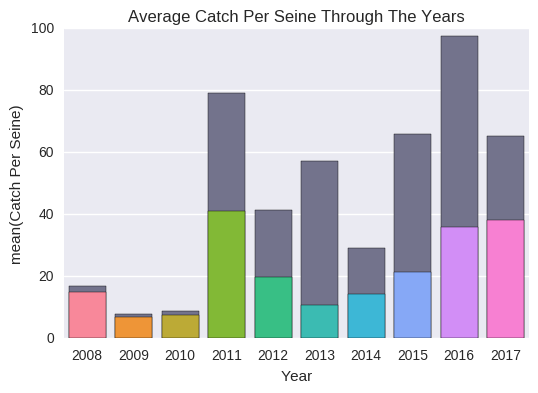

In [43]:
ax = sns.barplot(x="Year", y="Catch Per Seine", data=grouped_db, color= "blue",saturation =0.1)
ax = sns.barplot(x="Year", y="Catch Per Seine", data=nojellygrouped_db, saturation = 1)
ax.set_title('Average Catch Per Seine Through The Years')

In [44]:
df = graph_db[['Grouped Corrected Common Name', 'Corrected Quantity','Year']]


In [45]:
new_li = []
for value in df['Grouped Corrected Common Name']:
    if value not in ['atlantic silverside','comb jelly', 'shrimp']:
        new_li.append('Other Organisms')
    else:
        new_li.append(value)

In [46]:
df['Grouped Corrected Common Name'] = new_li

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
df.head()

,Grouped Corrected Common Name,Corrected Quantity,Year
0,Other Organisms,1,2008
1,shrimp,1,2008
2,shrimp,1,2008
3,shrimp,1,2008
4,Other Organisms,1,2008


In [48]:
our_df = df.groupby(['Grouped Corrected Common Name', 'Year'], as_index=False).sum()


In [49]:
our_df = our_df[our_df['Year'] != 2018]

In [50]:
bars1 = our_df[our_df['Grouped Corrected Common Name'] == 'Other Organisms']['Corrected Quantity']
bars2 = our_df[our_df['Grouped Corrected Common Name'] == 'atlantic silverside']['Corrected Quantity']
bars3 = our_df[our_df['Grouped Corrected Common Name'] == 'comb jelly']['Corrected Quantity']
shrimp = our_df[our_df['Grouped Corrected Common Name'] == 'shrimp']['Corrected Quantity']
head = ['species'] + range(2008,2018)
shrimp = list(shrimp)
shrimp.insert(0,'shrimp')
org =  list(bars1)
org.insert(0, 'other organisms')
atl = list(bars2)
atl.insert(0, 'atlantic silverside')
comb = list(bars3)
comb.insert(0, 'comb jelly')

In [51]:
df2 = pd.DataFrame(columns=head, data=[org,shrimp,atl,comb])

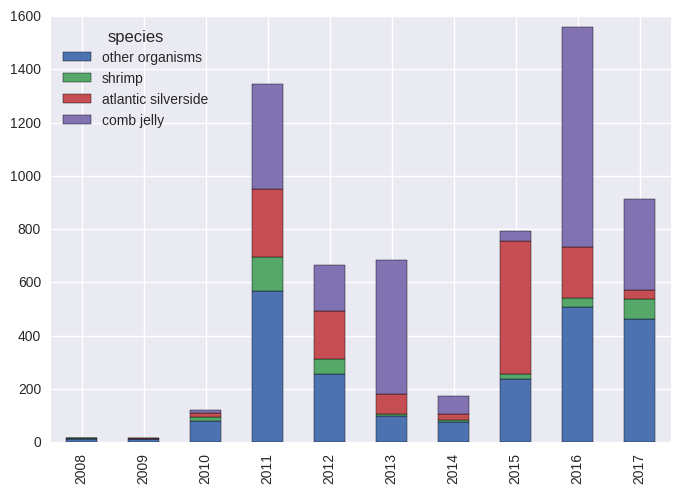

In [52]:

import seaborn as sns
sns.set()
df2.set_index('species').T.plot(kind='bar', stacked=True)

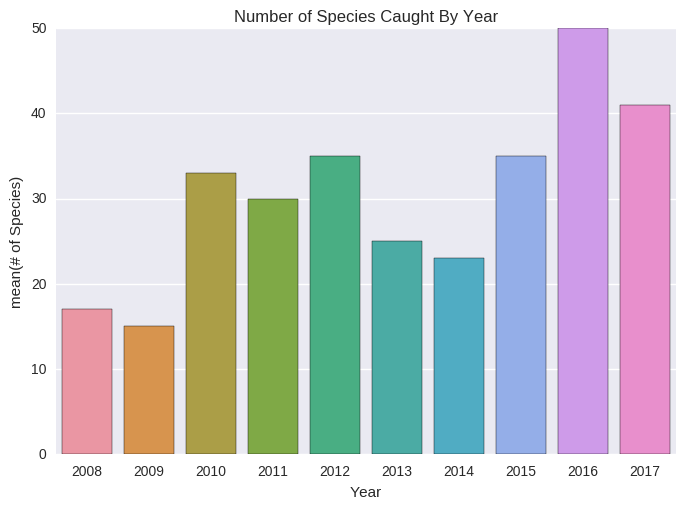

In [53]:
ax = sns.barplot(x="Year", y="# of Species", data=grouped_db)
ax.set_title('Number of Species Caught By Year')

In [54]:
grouped_db['Number of Distinct Species Caught Per Seine'] = 1.0*grouped_db['# of Species'] /grouped_db['# of Seins']

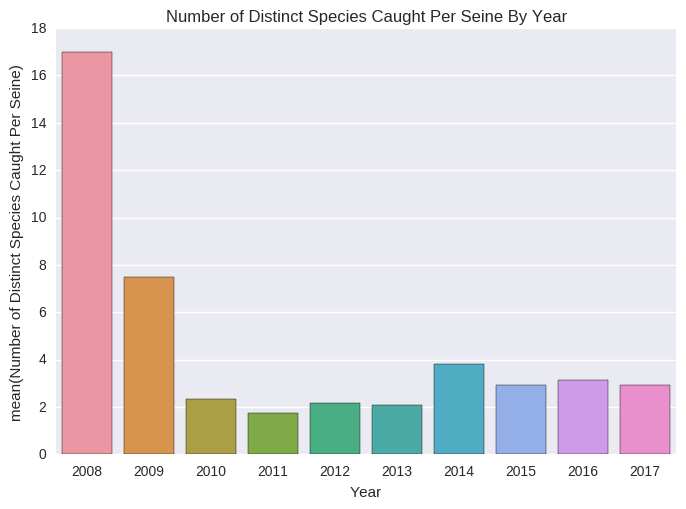

In [55]:
ax = sns.barplot(x="Year", y='Number of Distinct Species Caught Per Seine', data=grouped_db)
ax.set_title('Number of Distinct Species Caught Per Seine By Year')

In [56]:
graph_db.head()

,Date,Corrected # Hauls,Corrected Common Name,Corrected Quantity,Grouped Corrected Common Name,Year
0,2008-09-13,NaN,sea squirt,1,tunicates,2008
1,2008-09-13,NaN,shore shrimp,1,shrimp,2008
2,2008-09-13,NaN,mantis shrimp,1,shrimp,2008
3,2008-09-13,NaN,sand shrimp,1,shrimp,2008
4,2008-09-13,NaN,unidentified hermit crab,1,hermit crab,2008


In [57]:
Species_count_by_day = {}
for date in list(set(graph_db['Date'])):
    date_species = graph_db[graph_db['Date'] == date]
    species_count  = len(list(set(date_species['Corrected Common Name'])))
    Species_count_by_day[date] = species_count
    

In [58]:
species_group_db = graph_db.groupby('Date', as_index=False).sum()

In [59]:
species_group_db['Species Caught'] = [Species_count_by_day[date] for date in species_group_db['Date']]

In [60]:
species_graph_db=species_group_db[['Date', 'Species Caught']]

In [61]:
species_graph_db['Year'] = [x.year for x in species_graph_db['Date']]

/home/shad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
species_graph_db.head()

,Date,Species Caught,Year
0,2008-09-13,17,2008
1,2009-06-20,11,2009
2,2009-09-23,5,2009
3,2010-06-12,9,2010
4,2010-06-26,5,2010


In [63]:
Avg_Species_Caught_db = species_graph_db.groupby('Year', as_index = False).mean()

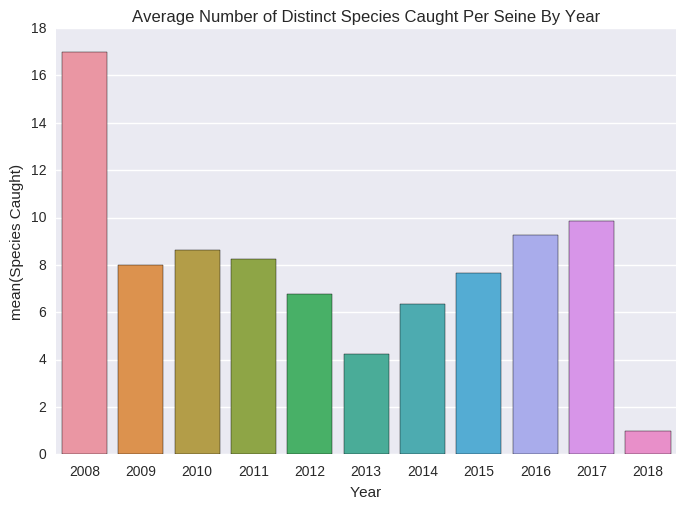

In [64]:
ax = sns.barplot(x="Year", y='Species Caught', data=Avg_Species_Caught_db)
ax.set_title('Average Number of Distinct Species Caught Per Seine By Year')